In [12]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"
print(dev_name)

सिमरन मतपाल


In [13]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from tabulate import tabulate
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx

In [14]:
df=pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
trans=[]
for i in range(0,df.shape[0]):
    a=[str(item) for item in df.iloc[i] if str(item) !='nan']
    trans.append(a)
trans[:5]   

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [17]:
# Step 1: Encode the transactions into one-hot encoded format
te = TransactionEncoder()
trans_encoded = te.fit_transform(trans)
df_encoded = pd.DataFrame(trans_encoded, columns=te.columns_)

In [18]:
# Define the function to get association rules with given support and confidence
def get_rules(min_support, min_confidence):
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Initialize the list to store results
results = []

# Try different values for support and confidence
support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]

for support in support_values:
    for confidence in confidence_values:
        rules = get_rules(support, confidence)
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# You can then select the optimal combination based on the number of rules generated.

    support  confidence  num_rules
0      0.01         0.2        162
1      0.01         0.3         63
2      0.01         0.4         18
3      0.01         0.5          2
4      0.02         0.2         55
5      0.02         0.3         20
6      0.02         0.4          3
7      0.02         0.5          0
8      0.03         0.2         27
9      0.03         0.3          7
10     0.03         0.4          1
11     0.03         0.5          0
12     0.04         0.2          9
13     0.04         0.3          4
14     0.04         0.4          1
15     0.04         0.5          0


In [19]:
min_support_values = [0.01, 0.02, 0.03, 0.04,0.05]

# Step 2: Loop through each minimum support value
for support in min_support_values:
    print(f"--- Minimum Support: {support} ---")
    
    # Apply Apriori algorithm to find frequent itemsets with the current support value
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    
    # Separate the itemsets into single, pair, and triplet
    single_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
    pair_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
    triplet_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]

    # Create a DataFrame for displaying
    results_df = pd.DataFrame({
        'Single Itemsets': single_itemsets['itemsets'].apply(lambda x: list(x)[0] if len(x) == 1 else None),
        'Pair Itemsets': pair_itemsets['itemsets'].apply(lambda x: list(x)),
        'Triplet Itemsets': triplet_itemsets['itemsets'].apply(lambda x: list(x))
    })

    # Fill NaN with empty string for cleaner display
    results_df = results_df.fillna('')

    # Convert DataFrame to list of lists for tabulate
    table_data = results_df.values.tolist()

    # Add column headers
    headers = [ 'Single Itemsets', 'Pair Itemsets', 'Triplet Itemsets']

    # Add summary row at the end to show count of itemsets
    summary_row = [
        f"Total: {len(single_itemsets)}",
        f"Total: {len(pair_itemsets)}",
        f"Total: {len(triplet_itemsets)}"
    ]

    # Append the summary row to table data
    table_data.append(summary_row)

    # Print the table using tabulate
    print(tabulate(table_data, headers=headers, tablefmt='pretty'))

    print("\n" + "-"*50 + "\n")

--- Minimum Support: 0.01 ---
+----------------------+-----------------------------------------+-----------------------------------------------------+
|   Single Itemsets    |              Pair Itemsets              |                  Triplet Itemsets                   |
+----------------------+-----------------------------------------+-----------------------------------------------------+
|       almonds        |                                         |                                                     |
|       avocado        |                                         |                                                     |
|    barbecue sauce    |                                         |                                                     |
|      black tea       |                                         |                                                     |
|      body spray      |                                         |                                                     |
| 

In [20]:
# After determining the best support value (e.g., best_support)
print(f"\n--- Generating Association Rules for Best Support: 0.03 ---\n")

# Step 1: Apply Apriori algorithm with the best support value
best_frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

# Step 2: Generate association rules from the frequent itemsets using minimum confidence
rules = association_rules(best_frequent_itemsets, metric="confidence", min_threshold=0.3)

# Step 3: Select relevant columns for better readability
rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Step 4: Count the number of rules
rule_count = rules.shape[0]

# Step 5: Display the rule count
print(f"Total number of association rules: {rule_count}")

# Step 6: Convert the DataFrame to a list of lists for tabulate
rules_table = rules_display.values.tolist()

# Step 7: Define headers for the table
headers = ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift']

# Step 8: Print the association rules in a table format using tabulate
print(tabulate(rules_table, headers=headers, tablefmt='pretty'))


--- Generating Association Rules for Best Support: 0.03 ---

Total number of association rules: 7
+----------------------------------+------------------------------+----------------------+---------------------+--------------------+
|           Antecedents            |         Consequents          |       Support        |     Confidence      |        Lift        |
+----------------------------------+------------------------------+----------------------+---------------------+--------------------+
|     frozenset({'chocolate'})     | frozenset({'mineral water'}) | 0.05265964538061592  | 0.3213995117982099  | 1.3483320682317521 |
| frozenset({'frozen vegetables'}) | frozenset({'mineral water'}) | 0.03572856952406346  | 0.37482517482517486 |  1.57246288387228  |
|    frozenset({'ground beef'})    | frozenset({'mineral water'}) | 0.040927876283162246 | 0.41655359565807326 | 1.7475215442008991 |
|    frozenset({'ground beef'})    |   frozenset({'spaghetti'})   | 0.03919477403012932  | 0.3989

In [21]:
rules_h_c = association_rules(best_frequent_itemsets, metric="confidence", min_threshold=0.3)

# Print the count of rules
print(f"Number of rules: {len(rules_h_c)}")

# Display the top rows of the rules
rules_h_c.head()

Number of rules: 7


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465


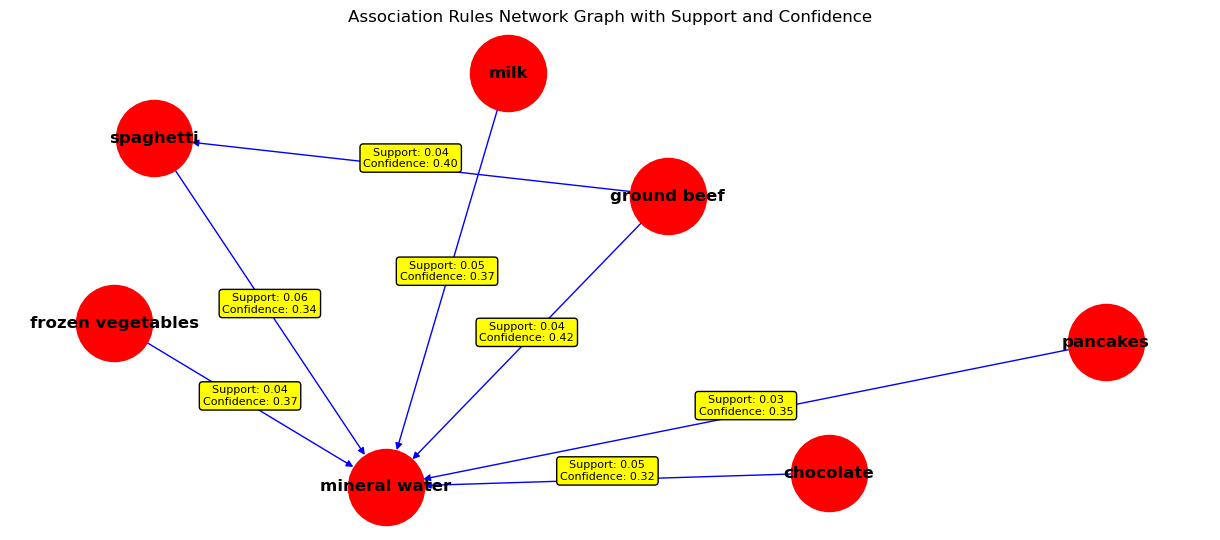

In [22]:
# Create a directed graph
G = nx.DiGraph()

# Adding edges with lift as weight
for i, rule in rules.iterrows():
    G.add_edge(tuple(rule['antecedents'])[0], tuple(rule['consequents'])[0], weight=rule['lift'])

# Prepare for plotting
plt.figure(figsize=(12, 5))
pos = nx.spring_layout(G, k=2)

# Draw the graph with custom colors
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='red', font_size=12, font_weight='bold', edge_color='blue')

# Add labels for support and confidence
for i, rule in rules.iterrows():
    antecedent = tuple(rule['antecedents'])[0]
    consequent = tuple(rule['consequents'])[0]
    support = rule['support']
    confidence = rule['confidence']
    
    # Get the positions of the nodes
    x1, y1 = pos[antecedent]
    x2, y2 = pos[consequent]
    
    # Calculate mid-point for the annotation
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2

    # Annotate support and confidence
    plt.annotate(f'Support: {support:.2f}\nConfidence: {confidence:.2f}', 
                 xy=(mid_x, mid_y), 
                 fontsize=8, 
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow'))

# Set the title and show the plot
plt.title('Association Rules Network Graph with Support and Confidence')
plt.show()